In [1]:
## This is to determine what went wrong during my 2024 HUT WC

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
#get data 
net_pic = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\CleanNet.PNG"
path = r"C:\Users\calholt\Documents\Callaway\NHL24\Data\NHL Scores 01152024.xlsx"
shots = pd.read_excel(path, sheet_name = 'Shot Raw Data')
regular = pd.read_excel(path, sheet_name = 'Data', header = 5)
wc = pd.read_excel(path, sheet_name = 'WC Data', header = 5)

#cut out bad data 
wc.drop(columns = ['Unnamed: 17','SMA'], inplace = True)
regular.drop(columns = ['Unnamed: 12','SMA'], inplace = True)
shots.fillna(0, inplace = True)


In [4]:
## Data is good, lets etablish how I was doing going into this

In [5]:
## Record 

regular.head()
regular.Outcome.value_counts()

Outcome
W      18
L      18
OTL     6
SOL     4
OTW     2
Name: count, dtype: int64

In [6]:
shots.head()

,Location,Photo,MNA Shots,MNA G,Opp Shots,Opp G
0,1,Sample 2.1,0.0,0.0,1.0,1.0
1,2,Sample 2.1,1.0,0.0,0.0,0.0
2,3,Sample 2.1,0.0,0.0,1.0,0.0
3,4,Sample 2.1,0.0,0.0,0.0,0.0
4,5,Sample 2.1,0.0,0.0,0.0,0.0


In [7]:
# shooting
agg_shots = shots.drop(columns = ['Photo']).groupby('Location').sum()

In [8]:
agg_shots.reset_index(inplace = True)

In [9]:
agg_shots.head(20)

,Location,MNA Shots,MNA G,Opp Shots,Opp G
0,1,0.0,0.0,1.0,1.0
1,2,1.0,0.0,1.0,1.0
2,3,0.0,0.0,2.0,0.0
3,4,1.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0
5,6,1.0,1.0,1.0,2.0
6,7,1.0,0.0,2.0,0.0
7,8,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0


In [10]:
agg_shots['Shots'] = agg_shots['Opp Shots'] + agg_shots['MNA Shots']
agg_shots['Total Goals'] = agg_shots['Opp G'] + agg_shots['MNA G']
agg_shots['Total Shots'] = agg_shots['Shots'] + agg_shots['Total Goals']
agg_shots['Shooting PCT'] = agg_shots['Total Goals']/ agg_shots['Total Shots']
agg_shots['Shot Dist'] = agg_shots['Total Shots'] / agg_shots['Total Shots'].sum()
agg_shots['Goal Dist'] = agg_shots['Total Goals'] / agg_shots['Total Goals'].sum()

In [21]:
agg_shots

,Location,MNA Shots,MNA G,Opp Shots,Opp G,Shots,Total Goals,Total Shots,Shooting PCT,Shot Dist,Goal Dist
0,1,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.500000,0.023810,0.055556
1,2,1.0,0.0,1.0,1.0,2.0,1.0,3.0,0.333333,0.035714,0.055556
2,3,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.000000,0.023810,0.000000
3,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.011905,0.000000
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,6,1.0,1.0,1.0,2.0,2.0,3.0,5.0,0.600000,0.059524,0.166667
6,7,1.0,0.0,2.0,0.0,3.0,0.0,3.0,0.000000,0.035714,0.000000
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [12]:
agg_shots.fillna(0,inplace = True)

In [16]:
def getShotMap(dataframe, col, scheme):
    grid_values = dataframe[col].values.reshape((6, 6))

    # Load the net image
    background_img = plt.imread(net_pic)

    # Create subplots with 33% vertical shrinkage
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize if needed

    # Set the extent to match the matrix (adjust vertical extent as needed)
    extent_matrix = (0, 6, 0, 6)
    extent_image = (0, 6, 0, 6)  # Match the matrix size

    # Plot the 6x6 matrix first
    cmap = plt.get_cmap(scheme)
    im = ax.imshow(grid_values, cmap=cmap, interpolation='nearest', vmin=0, vmax=np.max(dataframe[col]), extent=extent_matrix)

    # Add text annotations for each cell with floating-point labels
    for i in range(6):
        for j in range(6):
            ax.text(j + 0.5, i + 0.5, f'{grid_values[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

    # Plot the background image on top of the matrix with some transparency
    ax.imshow(background_img, extent=extent_image, aspect='auto', zorder=1, alpha=0.5)

    # Add a colorbar for reference
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.1)

    # Hide axes for better visibility
    ax.axis('off')

    # Set the title
    ax.set_title(col)

    # Show the plot
    plt.show()

# Example usage:
# getShotMap3(your_dataframe, 'your_column_name')


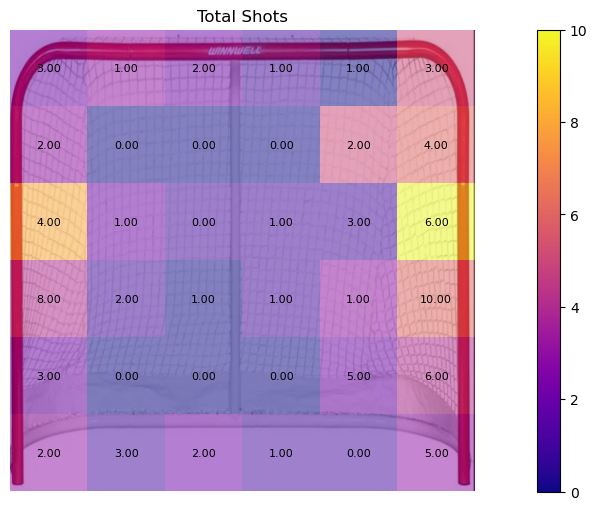

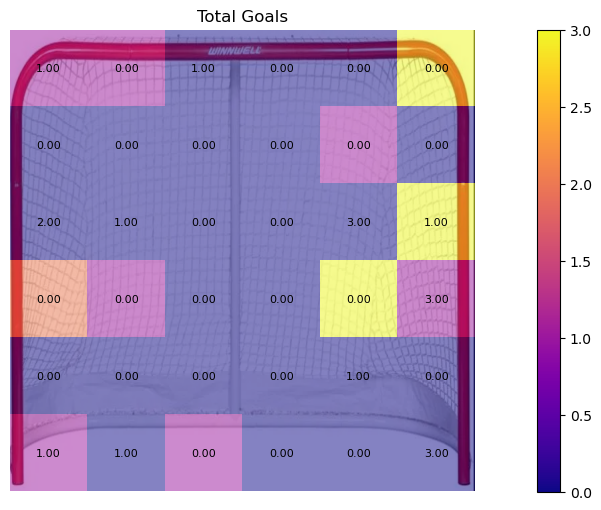

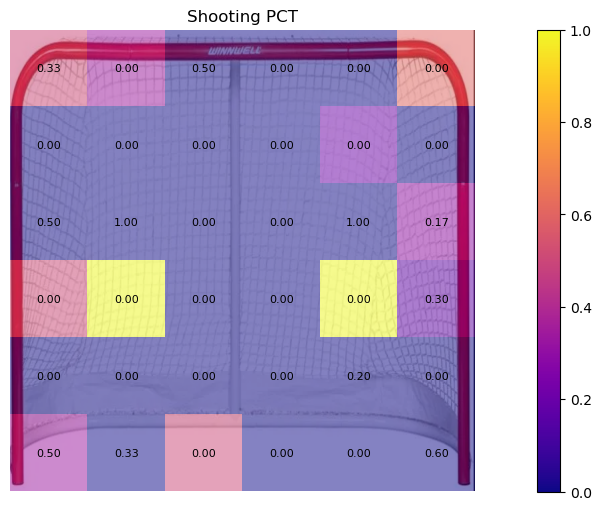

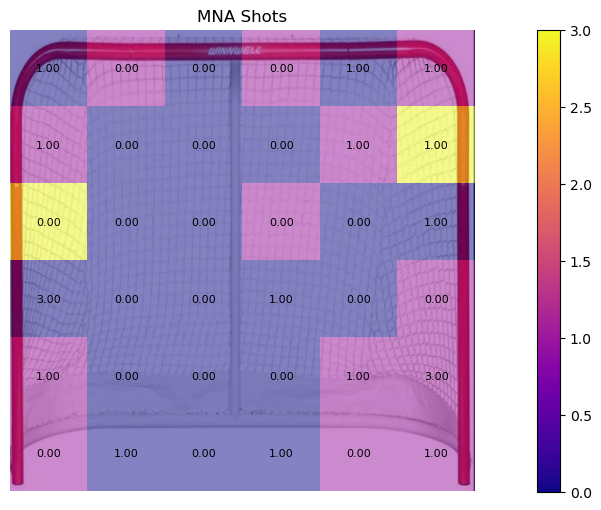

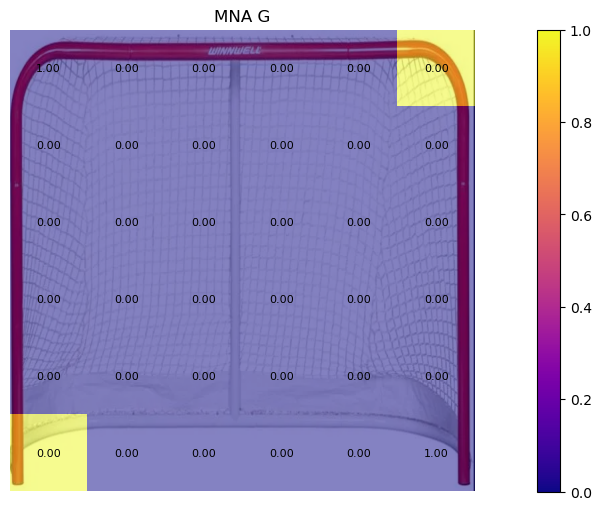

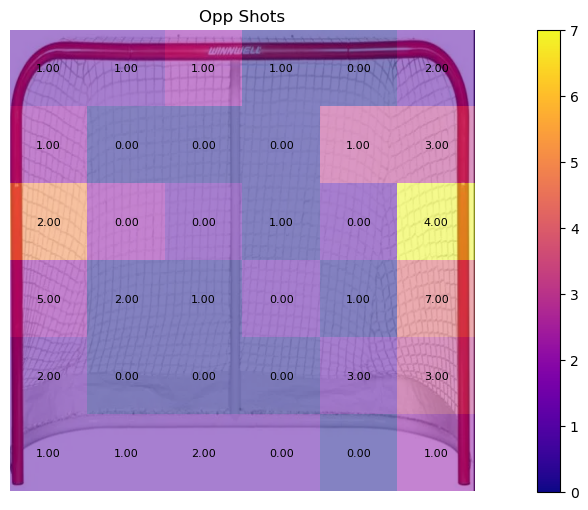

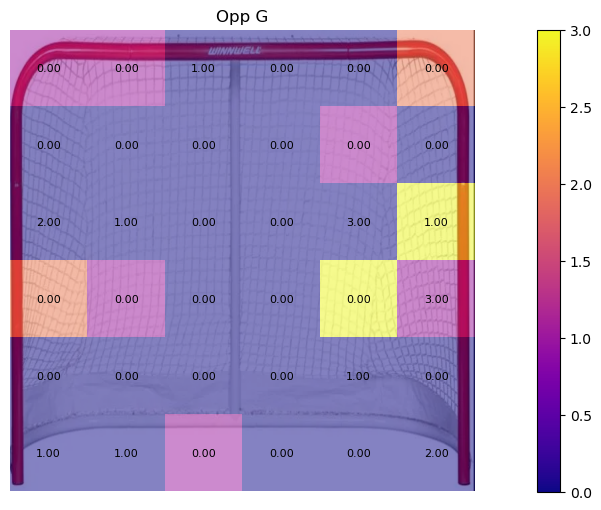

In [17]:
for value in ['Total Shots','Total Goals','Shooting PCT','MNA Shots', 'MNA G', 'Opp Shots', 'Opp G']:

    getShotMap(agg_shots, value, "plasma")

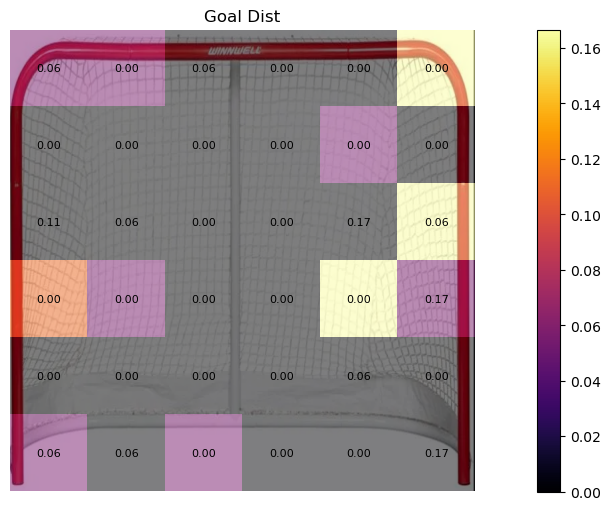

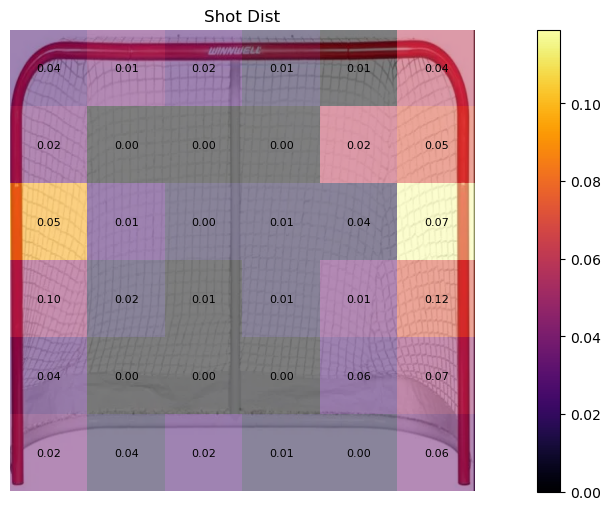

In [20]:
for value in ['Shot Dist', 'Shot Dist']:
    getShotMap(agg_shots, value, "inferno")